In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('spotify_artist_info.csv')
print(raw_data.head())

                      ids           names  popularity  followers genres  \
0  68JRsR0O5ynf8xhu2jk2no             eqd           6       1974    NaN   
1  5VvZ6Br2O5ffnhkZt2HE8Q    チキンガーリックステーキ           3        140    NaN   
2  2P3aLwJ41aRYkyFFw2FRM7  sam concepcion          45     168497    opm   
3  3ZzXi1Y1BvnvKJSVvzU2iP       vibemares           0        151    NaN   
4  2ZC9B5qSrV48WOrOujZkNC        lantinor           0          1    NaN   

   first_release  last_release  num_releases  num_tracks  monthly_listeners  
0           2007          2023            10           2             1444.0  
1           2004          2010            12           2              231.0  
2           2007          2023            20           1           583900.0  
3           1996          1997             2           5              101.0  
4           2019          2019             1          12                0.0  


# Data Cleansing

In [3]:
nans = raw_data.isnull().sum()
print('data with null values:')
print(nans)

data with null values:
ids                      0
names                    0
popularity               0
followers                0
genres               24563
first_release            0
last_release             0
num_releases             0
num_tracks               0
monthly_listeners       12
dtype: int64


In [4]:
remove_nulls = raw_data.dropna(how='any')
print('rows removed: ' + str(len(raw_data) - len(remove_nulls)))

rows removed: 24567


In [5]:
negative_one = remove_nulls[(remove_nulls['first_release'] == -1) | (remove_nulls['last_release'] == -1)]
print('rows with -1 values: ' + str(len(negative_one)))
clean_releases = remove_nulls.drop(negative_one.index)
print('rows removed: ' + str(len(remove_nulls) - len(clean_releases)))

rows with -1 values: 481
rows removed: 481


In [6]:
clean_data = clean_releases.rename(columns={'ids': 'id', 'names': 'name', 'genres': 'genre'})
clean_data.to_csv('spotify_artist_info_clean_data_jimmy_lee.csv')
print(clean_data.head())

                        id              name  popularity  followers  \
2   2P3aLwJ41aRYkyFFw2FRM7    sam concepcion          45     168497   
6   2FCVB3cfCC0e3O8G7Gs8t6      bleib modern          28      23349   
7   3ZaPFQ05J5qSM5I3Smbp44            tevvez          58     259154   
10  71WUmUmWWaqqGtVP8MlPJb     semi.official           4       1050   
19  38aJccTPkdNbEU7MVQ2n5b  the remus lupins           8       7246   

                                  genre  first_release  last_release  \
2                                   opm           2007          2023   
6           dark post-punk, modern goth           2014          2024   
7                         gym hardstyle           2018          2024   
10  abstract hip hop, minnesota hip hop           2003          2003   
19                                wrock           2007          2009   

    num_releases  num_tracks  monthly_listeners  
2             20           1           583900.0  
6             14           3            

# Genre

In [7]:
from collections import Counter

# compute the primary genre (most popular genre of listed genres) by measuring counts of all genres
multigenre_primary = clean_data.copy()

genre_count = Counter()
for genre_list in multigenre_primary['genre'].str.split(','):
    for genre in genre_list:
        genre_count[genre] += 1

def get_genre_count(genre):
    return genre_count[genre]
        
def get_primary_genre(genre_list):
    best_genre = None
    best_count = 0
    for genre in genre_list:
        count = genre_count[genre]
        if count > best_count:
            best_genre = genre
            best_count = count
    return best_genre

multigenre_primary['primary_genre'] = multigenre_primary['genre'].str.split(',').apply(get_primary_genre)
print(multigenre_primary['primary_genre'].head(5))

2                  opm
6       dark post-punk
7        gym hardstyle
10    abstract hip hop
19               wrock
Name: primary_genre, dtype: object


In [45]:
top_10_genres = multigenre_primary.copy()

# TODO: make something that aggregates by primary genre, need to sort
top_10_genres = top_10_genres.groupby('primary_genre', as_index=False)[['popularity', 'followers', 'monthly_listeners']].agg('median')
top_10_genres['genre_count'] = top_10_genres['primary_genre'].apply(get_genre_count)
top_10_genres = top_10_genres.sort_values(by='genre_count', ascending = False).head(10)

top_10_genres_ungrouped = multigenre_primary.copy()
top_10_genres_ungrouped = top_10_genres_ungrouped[top_10_genres_ungrouped['primary_genre'].isin(top_10_genres['primary_genre'])]

print(meds)

 rock                  65.5
alternative metal      57.0
 r&b                   48.0
contemporary r&b       42.0
 symphonic metal       37.0
classic swedish pop    37.0
 melodic metalcore     32.0
 psychedelic trance    26.0
classical guitar       20.0
fallen angel            2.5
dtype: float64


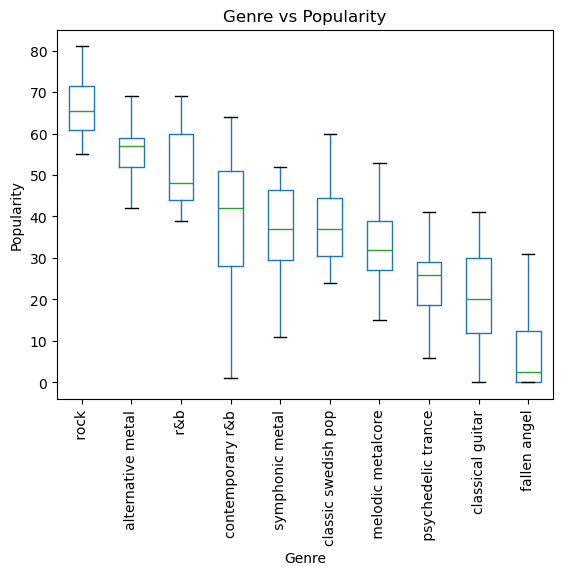

In [50]:
df = top_10_genres_ungrouped
by = 'primary_genre'
column = 'popularity'
df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
meds = df2.median().sort_values(ascending=False)

df2[meds.index].boxplot(grid=False, showfliers=False)
plt.title('Genre vs Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

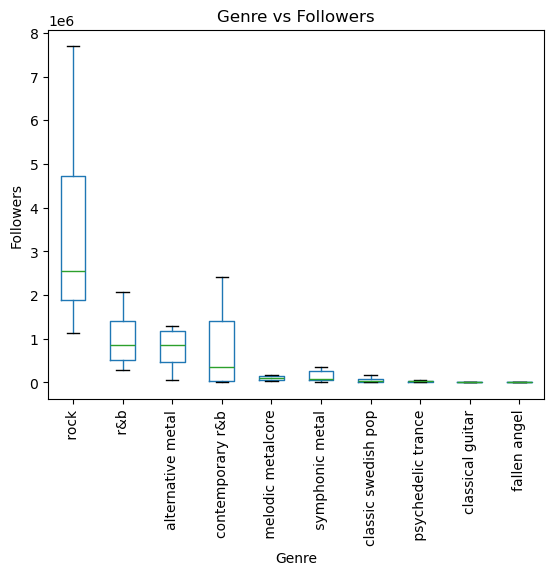

In [49]:
df = top_10_genres_ungrouped
by = 'primary_genre'
column = 'followers'
df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
meds = df2.median().sort_values(ascending=False)

df2[meds.index].boxplot(grid=False, showfliers=False)
plt.title('Genre vs Followers')
plt.xlabel('Genre')
plt.ylabel('Followers')
plt.xticks(rotation=90)
plt.show()

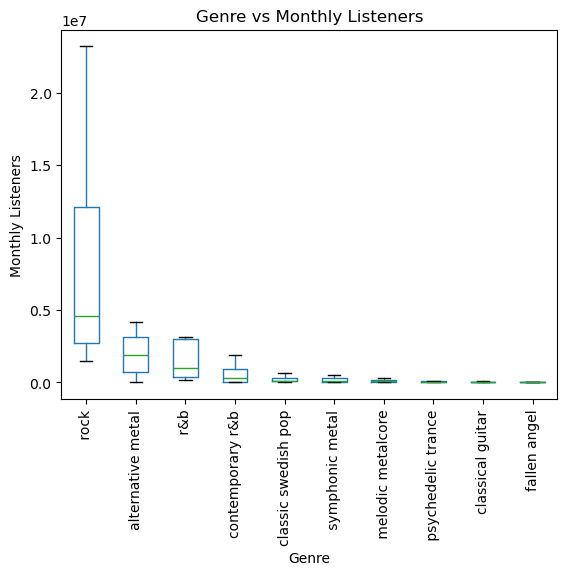

In [51]:
df = top_10_genres_ungrouped
by = 'primary_genre'
column = 'monthly_listeners'
df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
meds = df2.median().sort_values(ascending=False)

df2[meds.index].boxplot(grid=False, showfliers=False)
plt.title('Genre vs Monthly Listeners')
plt.xlabel('Genre')
plt.ylabel('Monthly Listeners')
plt.xticks(rotation=90)
plt.show()

# Release Years

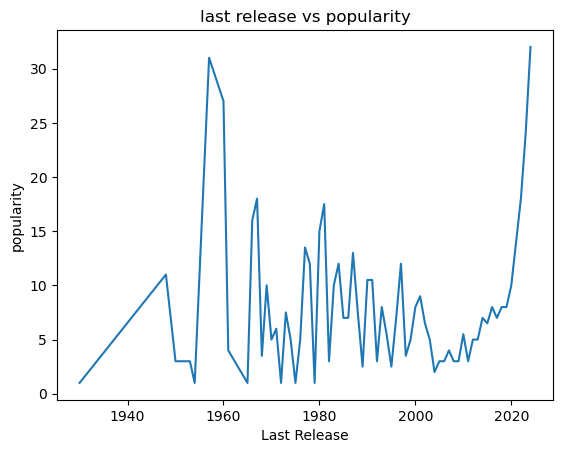

In [12]:
artists_by_last_release = clean_data.copy()
artists_by_last_release = artists_by_last_release.groupby('last_release', as_index=False)[['popularity', 'followers', 'monthly_listeners']].agg('median')
ax = sns.lineplot(x='last_release', y='popularity', data=artists_by_last_release)
ax.set_title('last release vs popularity')
ax.set_xlabel('Last Release')
plt.show()

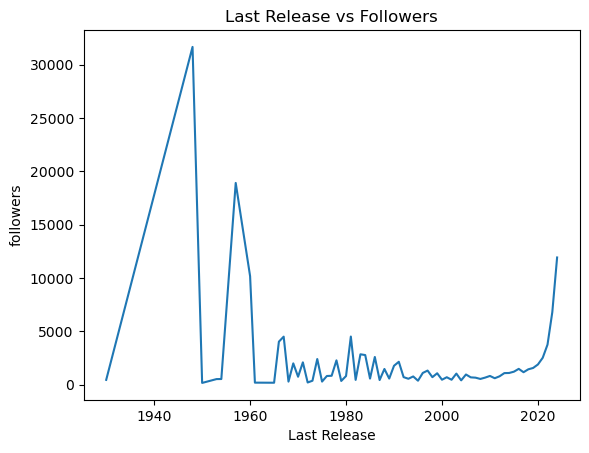

In [13]:
ax = sns.lineplot(x='last_release', y='followers', data=artists_by_last_release)
ax.set_title('Last Release vs Followers')
ax.set_xlabel('Last Release')
plt.show()

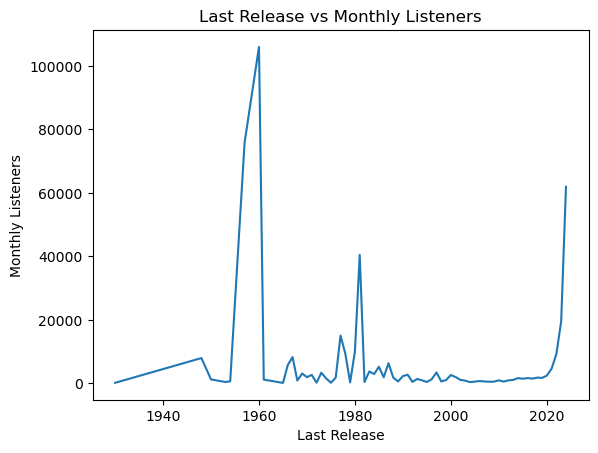

In [14]:
ax = sns.lineplot(x='last_release', y='monthly_listeners', data=artists_by_last_release)
ax.set_title('Last Release vs Monthly Listeners')
ax.set_xlabel('Last Release')
ax.set_ylabel('Monthly Listeners')
plt.show()

# Release Count

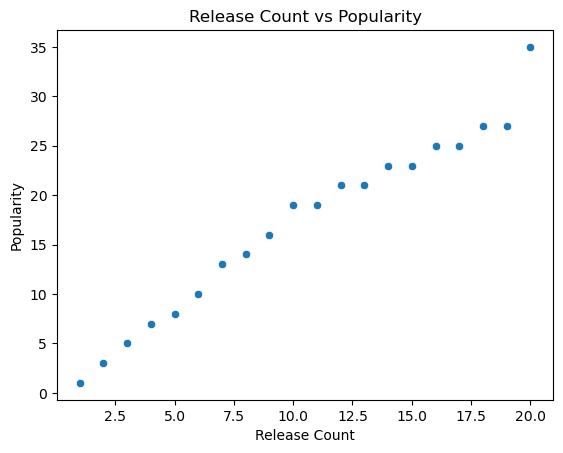

In [15]:
artists_by_num_releases = clean_data.copy()
artists_by_num_releases = artists_by_num_releases.groupby('num_releases', as_index=False)[['popularity', 'followers', 'monthly_listeners']].agg('median')
ax = sns.scatterplot(x='num_releases', y='popularity', data=artists_by_num_releases)
ax.set_title('Release Count vs Popularity')
ax.set_xlabel('Release Count')
ax.set_ylabel('Popularity')
plt.show()

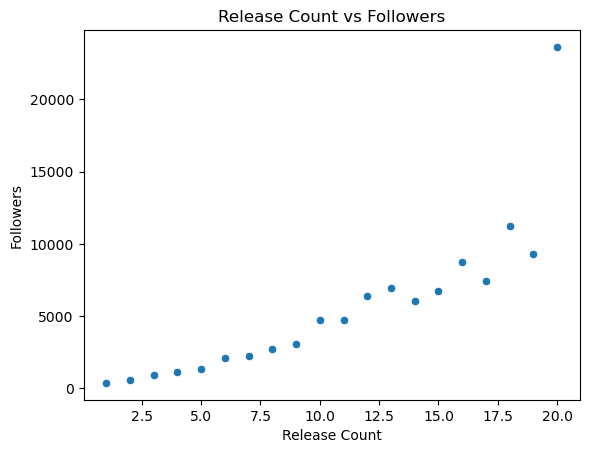

In [16]:
ax = sns.scatterplot(x='num_releases', y='followers', data=artists_by_num_releases)
ax.set_title('Release Count vs Followers')
ax.set_xlabel('Release Count')
ax.set_ylabel('Followers')
plt.show()

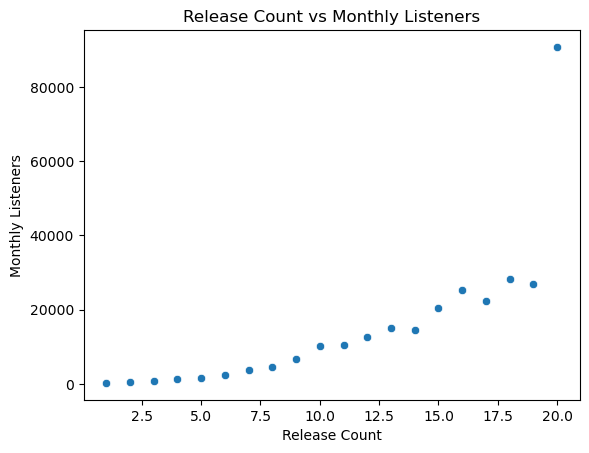

In [17]:
ax = sns.scatterplot(x='num_releases', y='monthly_listeners', data=artists_by_num_releases)
ax.set_title('Release Count vs Monthly Listeners')
ax.set_xlabel('Release Count')
ax.set_ylabel('Monthly Listeners')
plt.show()

# Insights

## Genre
Rock is the best performing genre across all goal metrics by a significant amount. We can attempt to convert or maintaini retention of Rock listeners by recommending more Rock songs for overall increase in time spent in the app.

Fallen Angel is the least performing of the top 10 listened to genres. However, it seems unethical to demote or restrict music published by that genre. So we may have to focus on the successes here.

## Release Years
Artists with their final release 2024 are successful in all goal metrics, but this is to be expected as modern songs tend to be popular for modern audiences. There is no action required for Modern music.

Artists ending their releases 1960 have a spike in popularity, so we can try to expose more people to these late 50's early 60's songs as they are already popular, with the hope of increasing time spent.

Followers and Monthly Listeners have similar data suggesting late 80's music is well retained and still listened to. As these artists have a dedicated fanbase, we can run a promotional event to bring more new users into spotify of this fanbase and instantly increase followers and monthly listeners overall.

## Release Count
All release count data show similar trends. The more releases there are, the higher our goal metrics are. As we have access to the artists' accounts on Spotify we can send them (particularly those with lower release counts) reminder messages that they can get more traction by adding more content, as studies show.